## Tutorial 6: Part B
Our aim in this activity is to visualise data on the map. 


## Installing Basemap:

conda install basemap

from the Anaconda command prompt (2.7)

whereas shapefile requires pip 

pip install pyshp 

## Plotting data on map:

In general, there are a couple of simple options for plotting data on (basemap) maps:
* Using Latitude and Longitude 

but if you want to plot on a country you may have to go for the middle or find an actual location
(e.g. Austin, Texas, USA rather than just USA)

There's also a nice example here:
http://introtopython.org/visualization_earthquakes.html

* Using shapefiles

These come as a set, the minimum is .dbf, shp & .shx

## A. Latitude and Longitude
based on 
http://vizclass.csc.ncsu.edu/2011/09/tutorial-geographic-data-on-map-with.html

In [1]:
from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt 
import numpy as np  
%matplotlib inline

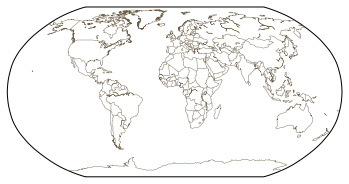

In [2]:
# start witha world map, draw the countries & the coasts
# lon_0 is central longitude of robinson projection. 
# resolution = 'c' means use crude resolution coastlines. 
m = Basemap(projection = 'robin', lon_0 = 0, resolution = 'c') 
# draw coastlines, country boundaries, fill continents. 
m.drawcoastlines(color = '#6D5F47', linewidth = .4) 
m.drawcountries(color = '#6D5F47', linewidth = .4)

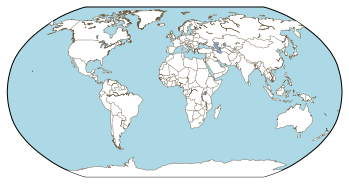

In [3]:
# add some colour
# set a background colour = water
# m.drawmapboundary(fill_color='#85A6D9') # using codes or just names:
m.drawmapboundary(fill_color='lightblue')

# draw coastlines, country boundaries, fill continents. 
m.fillcontinents(color = 'white', lake_color = '#85A6D9') 
m.drawcoastlines(color = '#6D5F47', linewidth = .4) 
m.drawcountries(color = '#6D5F47', linewidth = .4)

### Try to change the continents color to yellow!

{-90: ([<matplotlib.lines.Line2D at 0x1114788d0>], []),
 -60: ([<matplotlib.lines.Line2D at 0x111478ed0>], []),
 -30: ([<matplotlib.lines.Line2D at 0x11147f550>], []),
 0: ([<matplotlib.lines.Line2D at 0x11147fb90>], []),
 30: ([<matplotlib.lines.Line2D at 0x11148b210>], []),
 60: ([<matplotlib.lines.Line2D at 0x11148b850>], [])}

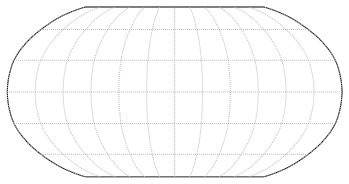

In [4]:
# We can also ask Basemap to draw lines of longitude and latitude. 
# draw lat/lon grid lines every 30 degrees. 
m.drawmeridians(np.arange(-180, 180, 30), color='#bbbbbb') 
m.drawparallels(np.arange(-90, 90, 30), color='#bbbbbb')

In [5]:
# Example data: Populate three arrays of equal length with the latitude, longitude and population values for each city. 

lats = [35.69,37.569,19.433,40.809,18.975,-6.175,-23.55,28.61,34.694,31.2] 
lngs = [139.692,126.977,-99.133,-74.02,72.825,106.828,-46.633,77.23,135.502,121.5] 
populations = [32.45,20.55,20.45,19.75,19.2,18.9,18.85,18.6,17.375,16.65] #millions

In [6]:
# Use our basemap object to convert the latitude/longitude values into map display coordinates. 
# compute the native map projection coordinates for cities 
x,y = m(lngs,lats)

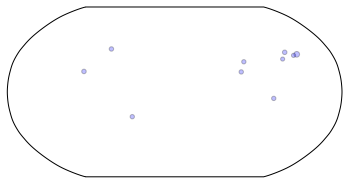

In [7]:
# Use the matplotlib scatter function to plot the circles. Note the use of the zorder parameter. 
# This ensures that the scattered circles will be rendered ON TOP of the continents. 
# scatter scaled circles at the city locations 
m.scatter(x, y, s = populations, # where x, y came from lat, lon
          marker = 'o', # symbol 
          alpha = 0.25, # transparency 
          zorder = 2, # plotting order 
         )



### What problems can you see with these dots?
   - dots are too small use scaled data, don't like blue on blue so much either
  

#### 1- Scale populations to emphasise different relative population sizes 

In [8]:
#Solution:
# Multiply each population by itself to create a scaled list of values. 
# These will be our circle display sizes. 
s_populations = [p * p for p in populations] 
# otherwise the dots are too small

#### 2. Now rewrite m.scatter using the scaled data and a different color?

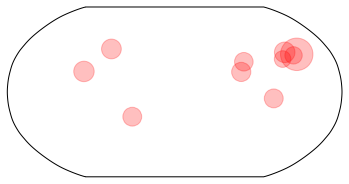

In [9]:
## Solution:
m.scatter(x, y, s = s_populations, # where x, y came from lat, lon
          color = "red",
          marker = "o", # symbol 
          alpha = 0.25, # transparency 
          zorder = 2, # plotting order 
         )

## Now just put it all together:



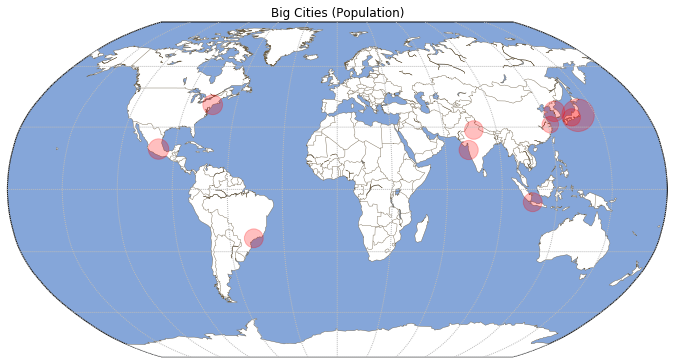

In [10]:
##Solution:

from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt 
import numpy as np  
%matplotlib inline

plt.figure(figsize = (12,6)) # make it bigger first

m = Basemap(projection = 'robin', lon_0 = 0, resolution = 'c') 
#set a background colour 
m.drawmapboundary(fill_color = '#85A6D9')
m.fillcontinents(color = 'white', lake_color = '#85A6D9') 
m.drawcoastlines(color = '#6D5F47', linewidth = .4) 
m.drawcountries(color = '#6D5F47', linewidth = .4)
m.drawmeridians(np.arange(-180, 180, 30), color = '#bbbbbb') 
m.drawparallels(np.arange(-90, 90, 30), color = '#bbbbbb')
lats = [35.69,37.569,19.433,40.809,18.975,-6.175,-23.55,28.61,34.694,31.2] 
lngs = [139.692,126.977,-99.133,-74.02,72.825,106.828,-46.633,77.23,135.502,121.5] 
populations = [32.45,20.55,20.45,19.75,19.2,18.9,18.85,18.6,17.375,16.65] #millions
x,y = m(lngs,lats)
s_populations = [p * p for p in populations]
m.scatter(x, y, s = s_populations,
          marker = 'o', # symbol 
          color = "red",
          alpha = 0.25, # transparency 
          zorder = 2, # plotting order 
         )
plt.title('Big Cities (Population)') 
plt.show()



### * Excersie: Change the dot color to blue if the population is less than 19 million?

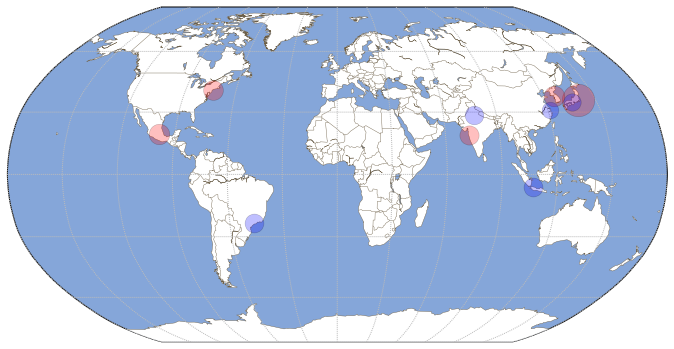

In [11]:
## Solution: 
from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt 
import numpy as np  
%matplotlib inline


def get_marker_color(population):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if population < 19:
        return ('bo')
    else:
        return ('ro')

plt.figure(figsize = (12,6)) # make it bigger first

m = Basemap(projection = 'robin', lon_0 = 0, resolution = 'c') 
#set a background colour 
m.drawmapboundary(fill_color = '#85A6D9')
m.fillcontinents(color = 'white', lake_color = '#85A6D9') 
m.drawcoastlines(color = '#6D5F47', linewidth = .4) 
m.drawcountries(color = '#6D5F47', linewidth = .4)
m.drawmeridians(np.arange(-180, 180, 30), color = '#bbbbbb') 
m.drawparallels(np.arange(-90, 90, 30), color = '#bbbbbb')
lats = [35.69,37.569,19.433,40.809,18.975,-6.175,-23.55,28.61,34.694,31.2] 
lngs = [139.692,126.977,-99.133,-74.02,72.825,106.828,-46.633,77.23,135.502,121.5] 
populations = [32.45,20.55,20.45,19.75,19.2,18.9,18.85,18.6,17.375,16.65] #millions

for lng, lat, s in zip(lngs, lats, populations):
    x,y = m(lng, lat)
    msize =s
    colour = get_marker_color(s)
    m.plot(x, y, colour, markersize=msize, alpha = 0.25 )
 
plt.show()

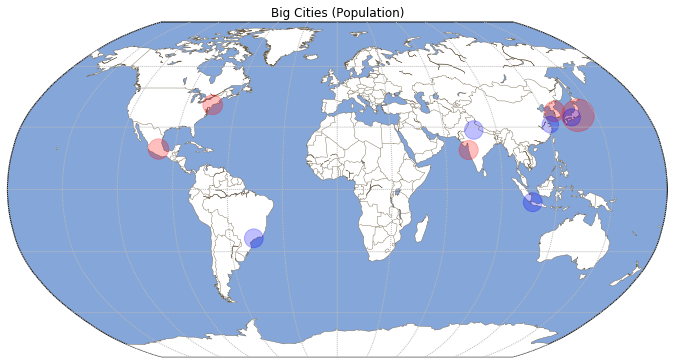

In [12]:
##Solution:
from mpl_toolkits.basemap import Basemap 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
%matplotlib inline

plt.figure(figsize = (12,6)) # make it bigger first

m = Basemap(projection = 'robin', lon_0 = 0, resolution = 'c') 
#set a background colour 
m.drawmapboundary(fill_color = '#85A6D9')
m.fillcontinents(color = 'white', lake_color = '#85A6D9') 
m.drawcoastlines(color = '#6D5F47', linewidth = .4) 
m.drawcountries(color = '#6D5F47', linewidth = .4)
m.drawmeridians(np.arange(-180, 180, 30), color = '#bbbbbb') 
m.drawparallels(np.arange(-90, 90, 30), color = '#bbbbbb')

df_3 = pd.DataFrame({'lats':[35.69,37.569,19.433,40.809,18.975,-6.175,-23.55,28.61,34.694,31.2],
                     'lngs':[139.692,126.977,-99.133,-74.02,72.825,106.828,-46.633,77.23,135.502,121.5],
                     'populations':[32.45,20.55,20.45,19.75,19.2,18.9,18.85,18.6,17.375,16.65]},
                    columns=['lats','lngs','populations']
                   )

x,y = m(df_3.lngs.values,df_3.lats.values)

m.scatter(x, y,
          s = df_3['populations'].apply(lambda x: x*x),
          marker = 'o', # symbol 
          color = pd.np.where(df_3['populations'] < 19,'blue','red'),
          alpha = 0.25, # transparency 
          zorder = 2, # plotting order 
         )
plt.title('Big Cities (Population)') 
plt.show()

In [13]:
for lng, lat, s in zip(lngs, lats, populations):
    x,y = m(lng, lat)
    msize =s*s
    print x 
    print y
    print msize

29379062.4998
12429417.0974
1053.0025
28159592.4803
12633895.1256
422.3025
7789168.53436
10691581.4223
418.2025
10575992.8187
12972420.8038
390.0625
23748774.8499
10642657.9515
368.64
27048076.1437
7955809.14166
357.21
12691859.0265
6099676.59287
355.3225
24013182.5756
11672245.7025
345.96
29056445.5893
12321581.1311
301.890625
27950807.8489
11948140.4216
277.2225


****

## B. Shapefiles

Based on http://stackoverflow.com/questions/15968762/shapefile-and-matplotlib-plot-polygon-collection-of-shapefile-coordinates

Install shapefile: 
* pip install pyshp


In [26]:
import numpy
# from numpy import array 
import matplotlib 
# and
%matplotlib inline

In [27]:
import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

### What are shape files?
The Shapefile format is a popular Geographic Information System vector data format created by Esri. For more information about this format please read the well-written “ESRI Shapefile Technical Description - July 1998” located at http://www.esri.com/library/whitepapers/pdfs/shapefile.pdf.Essentially, Shapefiles encode points, lines, curves, and polygons. This is useful for mapping applications where you need to represent county lines, major highways, lakes, etc. 

In [28]:
sf = shapefile.Reader("world_countries_boundary_file_world_2002") # note, no suffix, all 3 files are used
recs = sf.records()
shapes = sf.shapes()

In [29]:
# have a look at some of this data:
recs

[['Afghanistan',
  'AFG',
  'AF',
  65209,
  'Afghanistan',
  25067407,
  'Asia',
  'AFG',
  'Afghanistan'],
 ['Albania',
  'ALB',
  'AL',
  2740,
  'Albania',
  3153731,
  'Europe',
  'ALB',
  'Albania'],
 ['Algeria',
  'DZA',
  'DZ',
  238174,
  'Algeria',
  32854159,
  'NorthAfrica',
  'DZA',
  'Algeria'],
 ['Andorra', 'AND', 'AD', 0, 'Andorra', 73483, 'Europe', 'AND', 'Andorra'],
 ['Angola',
  'AGO',
  'AO',
  124670,
  'Angola',
  16095214,
  'Sub Saharan Africa',
  'AGO',
  'Angola'],
 ['Antarctica',
  'AQ',
  'ATA',
  0,
  'Antarctica',
  0,
  'Antarctica',
  'ATA',
  'Antarctica'],
 ['Antigua and Barbuda',
  'ATG',
  'AG',
  44,
  'Antigua and Barbuda',
  83039,
  'Caribbean',
  'ATG',
  'Antigua and Barbuda'],
 ['Argentina',
  'ARG',
  'AR',
  273669,
  'Argentina',
  38747148,
  'Latin America',
  'ARG',
  'Argentina'],
 ['Armenia', 'ARM', 'AM', 2820, 'Armenia', 3017661, 'Asia', 'ARM', 'Armenia'],
 ['Australia',
  'AUS',
  'AU',
  768230,
  'Australia',
  20310208,
  'Austral

In [30]:
# This is a list of the country name & country code (ISO) in two different formats, in alphabetical order
# how many records (countries) are there?
len(recs), len(shapes)

(211, 211)

In [31]:
ISO= numpy.array([item[1] for item in recs])
ISO

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AQ', 'ATG', 'ARG', 'ARM', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BEL', 'BLZ', 'BEN',
       'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA',
       'BDI', 'BLR', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'TCD', 'CHL',
       'CHN', 'COL', 'COM', 'COG', 'CRI', 'HRV', 'CUB', 'CYP', 'CZE',
       'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI',
       'EST', 'ETH', 'FLK', 'FRO', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF',
       'GAB', 'GMB', 'PSE', 'GEO', 'DEU', 'GHA', 'GRC', 'GRL', 'GRD',
       'GLP', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND',
       '                                                                                ',
       'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ',
       '                                                                                ',
       'IRL', 'IMY', 'ISR', 'ITA', 'CIV', 'JAM', 'SJM', 'JPN', 'JOR',
       'KAZ', 'KEN',
       '                                                

In [33]:
Nshp = len(shapes)

In [44]:
 shapes[10].parts

[0]

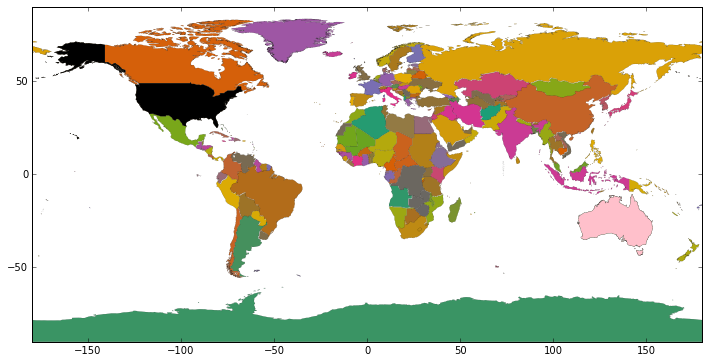

In [34]:


cccol = cm(1.*numpy.arange(Nshp)/Nshp) # one colour for every contry...
# plot
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)

# draw each country it's own colour, two get special attention:
# want USA to be black, AUS to be pink
for nshp in xrange(Nshp):
    ptchs   = []
    pts     = numpy.array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
        
    for pij in xrange(len(prt)):
         ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
    ax.add_collection(PatchCollection(ptchs,facecolor=cccol[nshp,:],edgecolor='k', linewidths=.1))
    
    # hack the colour for specific countries, actually alphabetical, need to know ISO code
    if recs[nshp][1] == "USA":
         ax.add_collection(PatchCollection(ptchs,facecolor=[0,0,0,1],edgecolor='k', linewidths=.1))  # black
    if recs[nshp][1] == "AUS":
         ax.add_collection(PatchCollection(ptchs,facecolor = "pink",edgecolor='k', linewidths=.1))  # pink
ax.set_xlim(-180,+180)
ax.set_ylim(-90,90)

plt.show()


### *Excercise: Change colour of Russia to red, Brazil to blue!

#### If you want to colour countries by some value e.g. population you need to pick a range of colours and do some scaling. You then need to assign a value to each country ( defined by its ISO). 

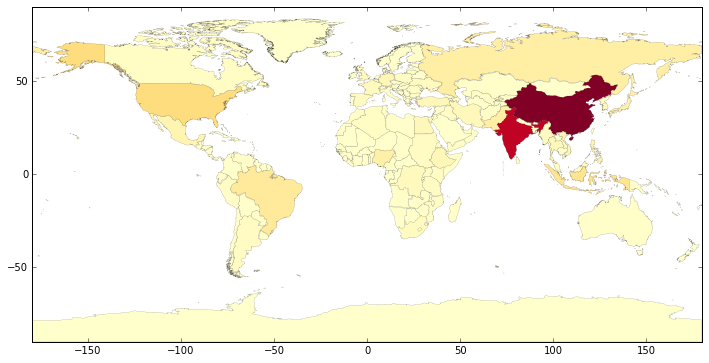

In [25]:
# Solution 
cm = matplotlib.cm.get_cmap('YlOrRd')

pops = [x[5] for x in recs]
scaled_pops = np.array(pops)*1.0/(max(pops))

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)

# draw each country it's own colour, two get special attention:
# want USA to be black, AUS to be pink
for nshp in xrange(Nshp):
    ptchs   = []
    pts     = numpy.array(shapes[nshp].points)
    prt     = shapes[nshp].parts
    par     = list(prt) + [pts.shape[0]]
        
    for pij in xrange(len(prt)):
         ptchs.append(Polygon(pts[par[pij]:par[pij+1]]))
    ax.add_collection(PatchCollection(ptchs,facecolor=cm(scaled_pops[nshp]),edgecolor='k',linewidths=.1))
    
ax.set_xlim(-180,+180)
ax.set_ylim(-90,90)

plt.show()